<a href="https://colab.research.google.com/github/chanonchacharu/Pima-Diabetes-Classification/blob/main/SIIT_DL2022_Project1_MLP_Pima_Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2 - Optimize your neural network (5%)
* Create a copy of projet template
* Deeper investigication of the problem (e.g. dataset and so on)
* Optimize the model by experimenting with various combinations

# Pima Indians Diabetes Database

## Sources:
- Original owners: `National Institute of Diabetes and Digestive and Kidney Diseases`
- Donor of database: `Research Center, RMI Group Leader Applied Physics Laboratory, The Johns Hopkins University`
- Number of Instances: 768
- Number of Attributes: 8 plus class
- For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
- Missing Attribute Values: Yes
- Class Distribution:
  * **Positive Tested** Class value = 1
  * **Negative Tested** Class value = 0
- Class Value  Number of instances
  * Class 0: 500
  * Class 1: 268

## Import neccessary libraries


In [34]:
from numpy import loadtxt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
%matplotlib inline

## Prepare data for training

In [35]:
# download diabetes datasest and its description
from IPython.display import clear_output
clear_output()
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv" -q
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names" -q
clear_output()

In [36]:
import pandas as pd
import numpy as np

columns_name = [
    "Pregnancies","Glucose","BloodPressure","SkinThickness",
    "Insulin","BMI", "DiabetesPedigreeFunction", "Age",	"Outcome"
]

dataset = loadtxt('/content/pima-indians-diabetes.data.csv', delimiter=',')

df = pd.DataFrame(dataset, columns=columns_name)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


## TODO 1: Split dataset into Input (X) and Output (y)

**Score: 1%**

**Input Variables (X):**
1. Number of times pregnant
2. Plasma glucose concentration at 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

**Output Variables (y):**
9. Class variable (0 or 1)

**Guideline:**

You can split the array into two arrays by selecting subsets of columns
using the standard NumPy slice operator or “:”.

Remember, in NumPy, the first column always started at 0

**Instruction:**

Split data into input (`X`) and output (`y`) variables, respectively. Repleace `None` to a number.

In [38]:
from sklearn.preprocessing import StandardScaler

dataset = loadtxt('/content/pima-indians-diabetes.data.csv', delimiter=',')

num_features = 8
X = dataset[:, 0:num_features]
y = dataset[:, num_features]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## TODO 2: Training and Testing

**Score: 1%**

**Instruction:**

Fill out `None` to split dataset into 80% and 20% for training and testing datasets, respectively.



In [39]:
# Testing
train = 0.80
train_b = int(np.rint(X.shape[0] * train))

train, train_b, X.shape[0] - train_b, X.shape[0]

(0.8, 614, 154, 768)

In [40]:
train = 0.80
train_b = int(np.rint(X.shape[0] * train))

X_train = X[0:train_b, :]
y_train = y[0:train_b]
X_test  = X[train_b:, :]
y_test  = y[train_b:]

In [41]:
# Show the result
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

## TODO 3: Build a model

**Score: 1%**

**Instruction:** Create a neural network model by adding each layer:
- The model expects rows of data with 8 variables
- The first hidden layer has 12 nodes and uses the `relu` activation function.
- The second hidden layer has 8 nodes and uses the `relu` activation function.
- The output layer has one node and uses the `sigmoid` activation function.

In [42]:
# Model Creation
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout

model = Sequential()
model.add(InputLayer(input_shape=(8,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

# model = Sequential()
# model.add(Dense(12, input_dim=8, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                144       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                272       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable 

## TODO 4: Compile a model

**Score: 1%**

**Instruction:** Specify loss function and optimizer
- Use cross entropy as the loss argument for a binary classification problems
- Define an optimizer as the efficient stochastic gradient descent algorithm

In [51]:
from keras.optimizers import SGD, Adam
# Define random seed for repeatability
seed = 6
np.random.seed(seed)

# Compile the model
sgd = SGD(learning_rate = 0.01)
adam = Adam(learning_rate = 0.01)
model.compile(
    loss="binary_crossentropy",
    optimizer= adam,
    metrics=['accuracy']
)

## TODO 5: Train a model

**Score: 1%**

**Instruction:** This problem will run for a small number of epochs (150) and use a relatively small batch size of 10

In [52]:
# fit the keras model on the dataset
hist = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=10,
    validation_data=(X_test, y_test),
    verbose=1
)
clear_output()

## Evaluation

At this stage, if your code works correctly, you should get accuracy of 76%.

**Question:** Do you think this model is efficient? Why don't you just investigate deeper?

Accuracy:  0.7662337422370911


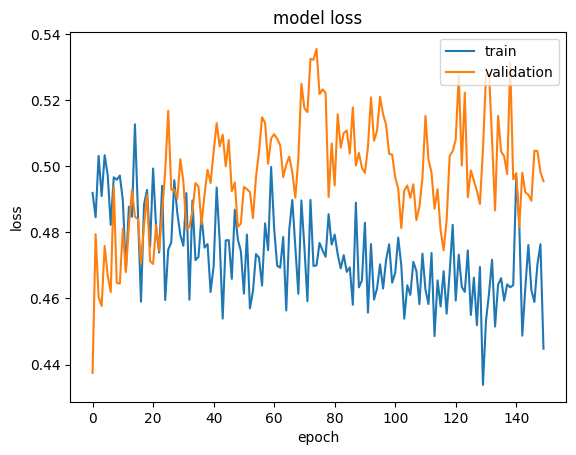

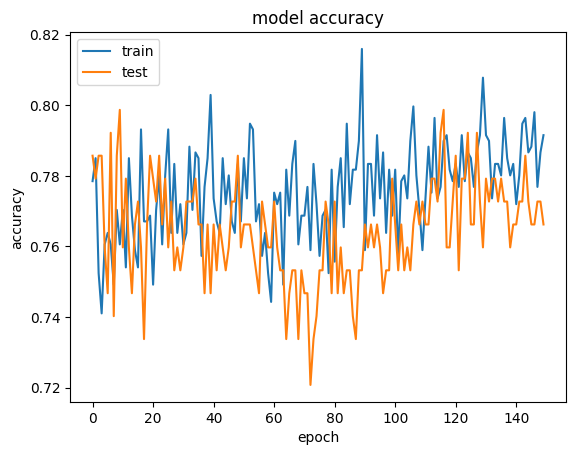

In [53]:
_, score = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: ", score)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

In [54]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(10):
	  print('%s \t=> %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

24/24 [==============================] - 0s 1ms/step
[0.6399472601593618, 0.8483237946271883, 0.149640752628208, 0.9072699252723591, -0.6928905722954664, 0.20401277134626386, 0.4684919773786552, 1.4259954044228451] 	=> 1 (expected 1)
[-0.8448850534430246, -1.1233963609784168, -0.16054574674686284, 0.5309015587207719, -0.6928905722954664, -0.6844219461567719, -0.36506077757159777, -0.19067190513648619] 	=> 0 (expected 0)
[1.233880185600316, 1.9437238810747468, -0.2639412465385531, -1.2882122129452327, -0.6928905722954664, -1.1032554558367744, 0.6043973178596749, -0.10558415200178453] 	=> 1 (expected 1)
[-0.8448850534430246, -0.9982077796701243, -0.16054574674686284, 0.15453319216918474, 0.12330164444496873, -0.49404307812040704, -0.9207626142050997, -1.0415494364835027] 	=> 0 (expected 0)
[-1.141851516163502, 0.5040551960293843, -1.5046872440388366, 0.9072699252723591, 0.7658359427299921, 1.4097456022432409, 5.484909100466952, -0.02049639886708288] 	=> 1 (expected 1)
[0.3429807974388845